# I] Import and options


In [148]:
import pandas, numpy, seaborn
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [149]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [150]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [153]:
%%time
#DL + open
path = input_file_directory + "mefs/mefs_proliferation/exp1_proliferation.csv"
prolif_df = pandas.read_csv(path, sep = ";")
#change comma to dot
prolif_df = prolif_df.astype(str)
prolif_df = prolif_df.apply(lambda x: x.str.replace(',','.'))
#convert to float
prolif_df = prolif_df.astype(float)
prolif_df = prolif_df.iloc[:31,:]
print(prolif_df.shape)
prolif_df.tail()

(31, 49)
Wall time: 24.9 ms


,Elapsed,Normal + DMEM + DMSO,dVSR(2) + DMEM + DMSO,EV + DMEM + DMSO,WT1 + DMEM + DMSO,dVSR(1) + DMEM + DMSO,WT2 + DMEM + DMSO,dVSR(2) + DMEM + BAF,Normal + DMEM + BAF,EV + DMEM + BAF,...,EV + Starvation + DMSO (Std Err Img),WT1 + Starvation + DMSO (Std Err Img),dVSR(1) + Starvation + DMSO (Std Err Img),WT2 + Starvation + DMSO (Std Err Img),dVSR(2) + Starvation + BAF (Std Err Img),Normal + Starvation + BAF (Std Err Img),EV + Starvation + BAF (Std Err Img),WT1 + Starvation + BAF (Std Err Img),dVSR(2) + Starvation + BAF (Std Err Img).1,WT2 + Starvation + BAF (Std Err Img)
26,52.0,86.82537,96.42653,94.97466,98.28023,96.87165,91.70433,66.47554,69.76159,62.73172,...,2.782084,3.091698,3.308378,2.522672,1.953691,2.855083,2.157001,3.642731,2.490677,2.294660
27,54.0,91.09386,96.64404,92.59055,95.63158,92.18909,83.09866,64.75056,74.52564,71.13065,...,2.453819,4.319202,2.749834,3.140880,2.887991,2.760447,2.854899,3.951364,3.387626,2.997449
28,56.0,94.62511,98.32720,94.85287,98.22715,97.70577,92.93327,75.39436,80.08359,83.17780,...,2.191453,6.036583,2.253902,3.614776,3.412214,2.758153,3.101831,4.040591,4.357156,3.960287
29,58.0,96.35883,97.99445,96.68823,98.52901,97.82701,94.64336,76.10619,78.96611,84.68988,...,2.271118,6.222861,2.711493,2.296404,3.228660,2.866705,1.957413,4.385201,4.414485,3.758769
30,60.0,95.47753,97.79563,97.60972,98.94588,97.17578,92.79214,66.81516,69.09030,70.62864,...,2.361734,3.224854,2.597328,1.912236,2.183641,2.475111,2.604975,4.567994,3.488782,2.819020


In [154]:
#I have 6 cell lines per condition and 4 conditions
##select RICH DMEM with only dmso
prolif_rich_DMSO = prolif_df.iloc[:,1:7].columns
##select RICH DMEM with only baf
prolif_rich_BAF = prolif_df.iloc[:,7:13].columns
##df with STARV with only dmso
prolif_starv_DMSO = prolif_df.iloc[:,13:19].columns
##df with STARV with only baf
prolif_starv_BAF = prolif_df.iloc[:,19:25].columns

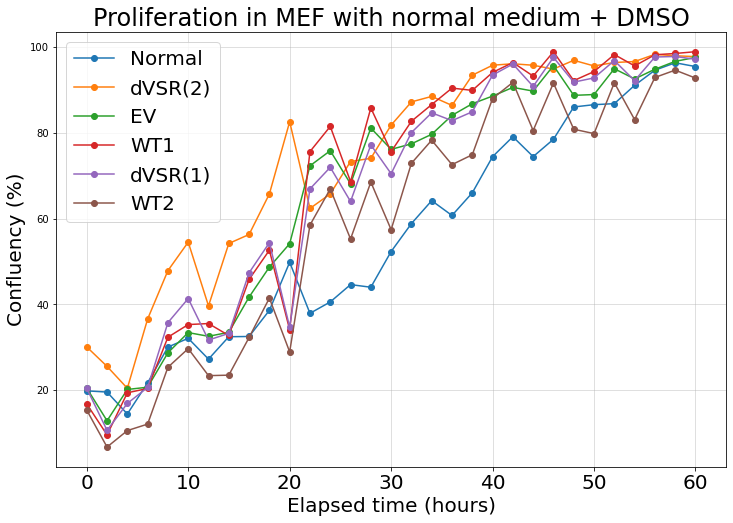

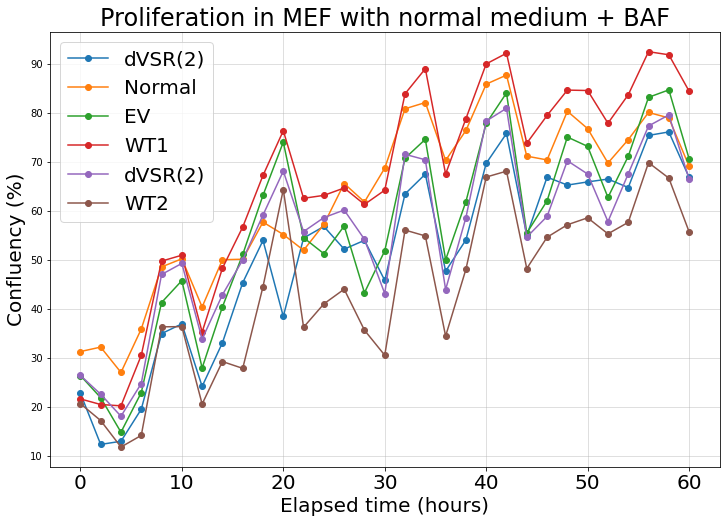

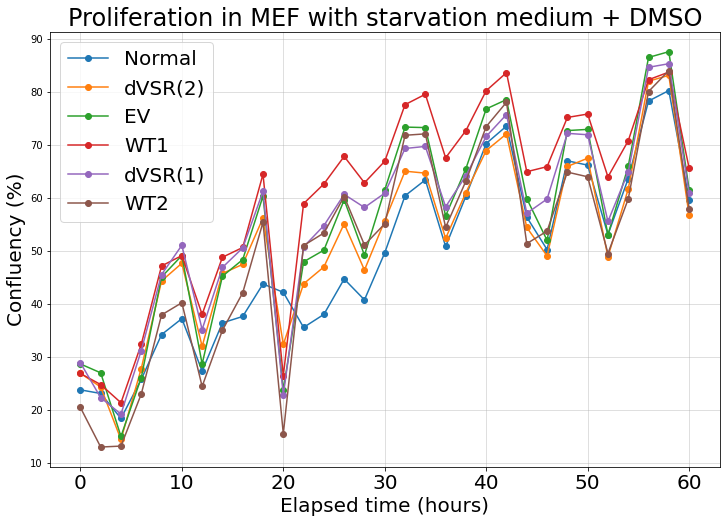

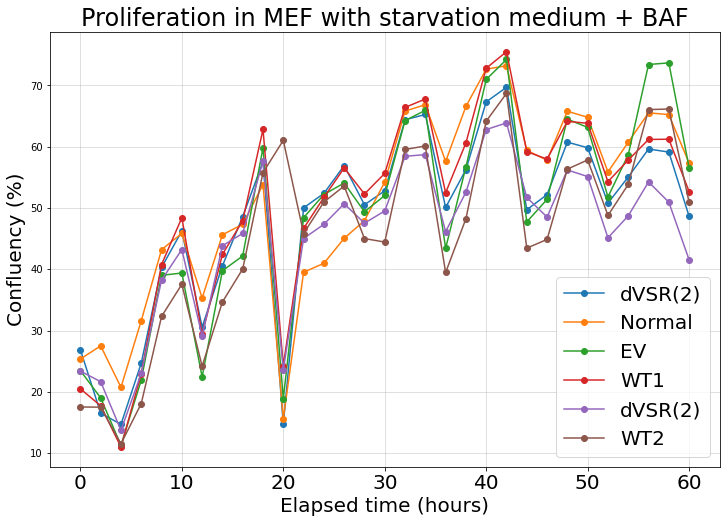

<Figure size 864x576 with 0 Axes>

In [156]:
#Visualization of all data
all_data = [[prolif_rich_DMSO, ' with normal medium + DMSO'],
            [prolif_rich_BAF, ' with normal medium + BAF'],
            [prolif_starv_DMSO, ' with starvation medium + DMSO'],
            [prolif_starv_BAF, ' with starvation medium + BAF']]
        
for data in all_data:
    col_selection = data[0]
    name = data[1]
    
    for column in col_selection:     
        label_ = column.split(' ')[0]
        #graph
        plt.grid()
        plt.plot(prolif_df['Elapsed'], prolif_df[column], 'o-', label= label_)
        plt.legend()
        plt.title('Proliferation in MEF'+name)
        plt.ylabel('Confluency (%)')
        plt.xlabel('Elapsed time (hours)')
    plt.grid(alpha = 0.5)
    plt.show()
    plt.clf()
    print()